In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Iris dataset
iris = load_iris()

# Use only two features for visualization (sepal length, sepal width)
X = iris.data[:, :2]
y = iris.target

# Create DataFrame for inspection
df = pd.DataFrame(X, columns=["sepal length", "sepal width"])
df["target"] = y
df.head()

,sepal length,sepal width,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [3]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Standardize features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

Missing values per column:
 sepal length    0
sepal width     0
target          0
dtype: int64


In [4]:
# Initialize with linear kernel
svm_linear = SVC(kernel="linear", C=1.0, random_state=42)

# Initialize with RBF kernel
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

In [5]:
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [6]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)


Linear Kernel SVM Performance:
Accuracy: 0.6888888888888889
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.60      0.56        15
   virginica       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45



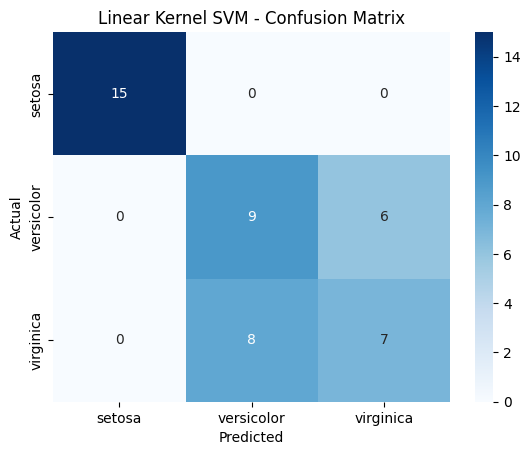


RBF Kernel SVM Performance:
Accuracy: 0.6888888888888889
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.60      0.56        15
   virginica       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45



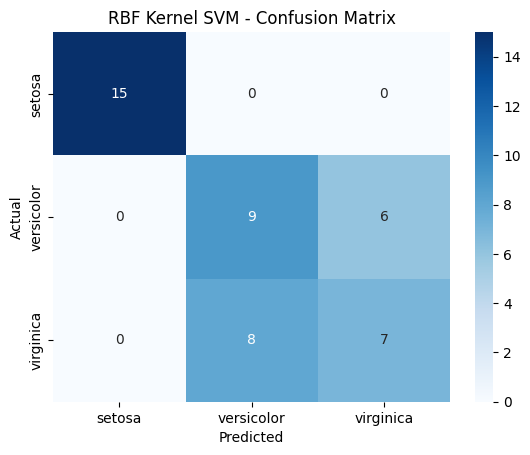

In [7]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} SVM Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, target_names=iris.target_names))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"{name} SVM - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model("Linear Kernel", y_test, y_pred_linear)
evaluate_model("RBF Kernel", y_test, y_pred_rbf)

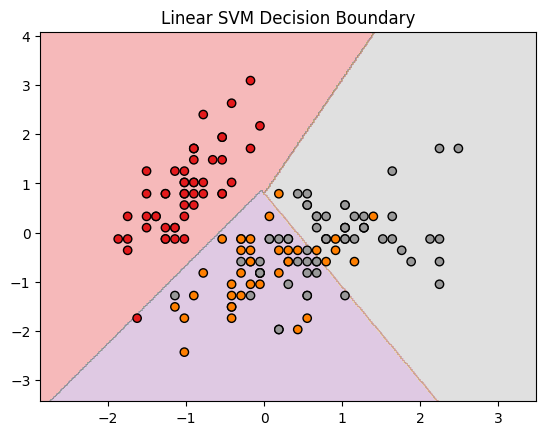

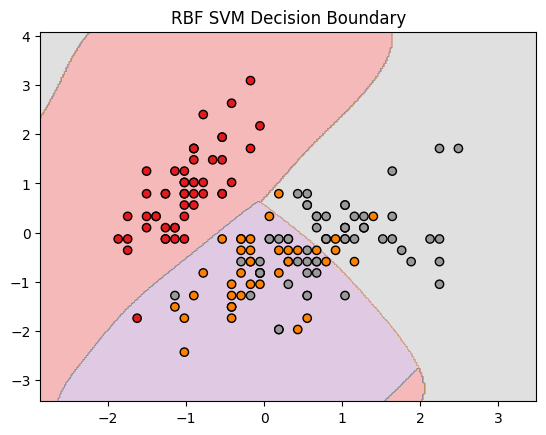

In [8]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Set1)
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X_scaled, y, "Linear SVM Decision Boundary")
plot_decision_boundary(svm_rbf, X_scaled, y, "RBF SVM Decision Boundary")

In [9]:
kernels = ["linear", "rbf", "poly", "sigmoid"]
results = []

for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma="scale", random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append({"Kernel": kernel, "Accuracy": acc})

results_df = pd.DataFrame(results)
results_df

,Kernel,Accuracy
0,linear,0.688889
1,rbf,0.688889
2,poly,0.688889
3,sigmoid,0.800000


In [10]:
print("Summary of Kernel Experiments:\n")
print(results_df)

best_kernel = results_df.loc[results_df["Accuracy"].idxmax()]
print("\nBest Performing Kernel:")
print(best_kernel)

Summary of Kernel Experiments:

    Kernel  Accuracy
0   linear  0.688889
1      rbf  0.688889
2     poly  0.688889
3  sigmoid  0.800000

Best Performing Kernel:
Kernel      sigmoid
Accuracy        0.8
Name: 3, dtype: object
